<a href="https://colab.research.google.com/github/NaveenS-07/AIML/blob/main/Multiple_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

In [ ]:
#If the as_frame parameter is true then the X and y variables will be presented in a pandas dataframe.
#If as_frame is false the data will be presented in an array

housing = fetch_california_housing(as_frame=True)
housing = housing.frame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
X = housing.drop(columns=['MedHouseVal'])
y = housing['MedHouseVal']

In [ ]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (20640, 8)
Shape of y: (20640,)


In [ ]:
X = X.values
y = y.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Shape of X:", X_train.shape)
print("Shape of y:", y_train.shape)

Shape of X: (16512, 8)
Shape of y: (16512,)


In [ ]:
# =======================================
# Multiple Linear Regression
# =======================================
model_multiple = LinearRegression()

# Train the model
model_multiple.fit(X_train, y_train)

y_pred_multiple = model_multiple.predict(X_test)

mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print("\nMultiple Linear Regression")
print(f"  Mean Squared Error: {mse_multiple:.4f}")
print(f"  R² Score: {r2_multiple:.4f}")


Multiple Linear Regression
  Mean Squared Error: 0.5559
  R² Score: 0.5758


In [ ]:
print(model_multiple.intercept_)

-37.02327770606391


In [ ]:
type(model_multiple)

sklearn.linear_model._base.LinearRegression

In [ ]:
model_multiple.predict(X[0:5])

array([4.15194269, 3.99952   , 3.6735803 , 3.25879473, 2.40284716])

In [ ]:
import pandas as pd
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_multiple})
print(predictions.head())

    Actual  Predicted
0  0.47700   0.719123
1  0.45800   1.764017
2  5.00001   2.709659
3  2.18600   2.838926
4  2.78000   2.604657


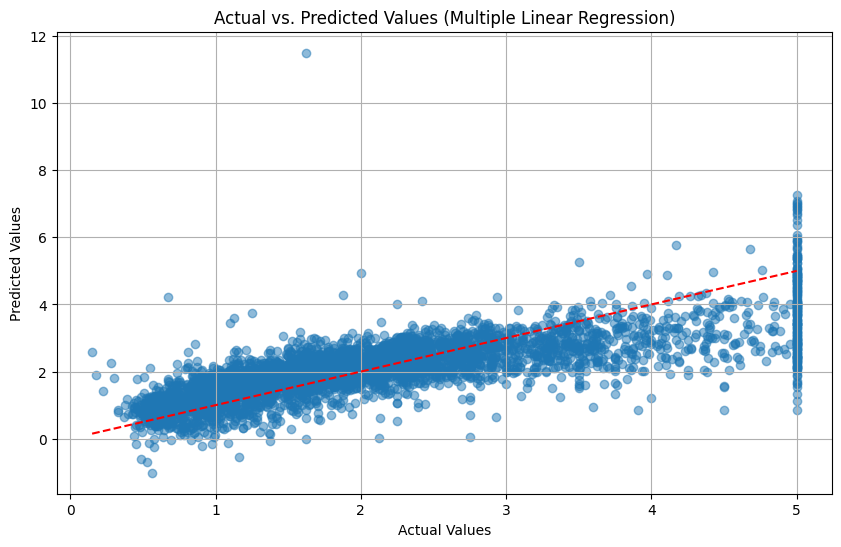

In [ ]:
# prompt: i need chart make code for it

import matplotlib.pyplot as plt

# Assuming 'predictions' DataFrame from the previous code
plt.figure(figsize=(10, 6))
plt.scatter(predictions['Actual'], predictions['Predicted'], alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Multiple Linear Regression)')
plt.grid(True)
plt.show()